In [2]:
# Dependencies and set up
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import ttest_ind

# data file 
southregion_path="South_data.csv"

# read data file
southregion=pd.read_csv(southregion_path)


In [3]:
# check column index
# southregion.columns
# check dataframe
southregion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,South,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,South,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,South,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54626,West Virginia,South,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.78,76.66,24.25,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
54627,West Virginia,South,Male,Good,10,5,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.75,90.72,29.53,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
54628,West Virginia,South,Female,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",...,1.63,82.55,31.24,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
54629,West Virginia,South,Male,Very good,2,4,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.73,77.11,25.85,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [4]:
# Replacing categorical/object data into integers
southregion.PhysicalActivities.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadHeartAttack.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadStroke.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadAsthma.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadSkinCancer.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadCOPD.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadDepressiveDisorder.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadKidneyDisease.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.HadArthritis.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.AlcoholDrinkers.replace(('Yes', 'No'), (1,0), inplace=True)
southregion.SmokerStatus.replace(('Former smoker', 'Never smoked', 'Current smoker-now smokes every day',
                                  'Current smoker-now smokes some days'), (0,1,2,3,), inplace=True)
southregion.ECigaretteUsage.replace(('Never used e-cigarettes in my entire life', 'Not at all (right now)',
                                     'Use them some days', 'Use them every day'), (0,1,2,3,), inplace=True)
southregion.RaceEthnicityCategory.replace(('White only, Non-Hispanic', 'Black only, Non-Hispanic', 'Hispanic',
                                   'Mulitracial, Non-Hispanic', 'Other race only, Non-Hispanic'), (0,1,2,3,4), inplace=True)
southregion.GeneralHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (0,1,2,3,4), inplace=True)
southregion.RemovedTeeth.replace(('None of them', '1 to 5', '6 or more, but not all',
                                  'All'), (0,1,2,3,), inplace=True)


southregion.head()


,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,South,Female,1,4,0,Within past year (anytime less than 12 months ...,1,9,0,...,1.60,71.67,27.99,0,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,South,Male,1,0,0,Within past year (anytime less than 12 months ...,1,6,0,...,1.78,95.25,30.13,0,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,South,Male,1,0,0,Within past year (anytime less than 12 months ...,0,8,2,...,1.85,108.86,31.66,1,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,South,Female,3,5,0,Within past year (anytime less than 12 months ...,1,9,0,...,1.70,90.72,31.32,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,South,Female,2,3,15,Within past year (anytime less than 12 months ...,1,5,1,...,1.55,79.38,33.07,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
hrtattack_sr=southregion.groupby('HadHeartAttack')['HadHeartAttack'].count()
hrtattack_sr

HadHeartAttack
0    51189
1     3442
Name: HadHeartAttack, dtype: int64

In [6]:
hrtattack_sr.index

Index([0, 1], dtype='int64', name='HadHeartAttack')

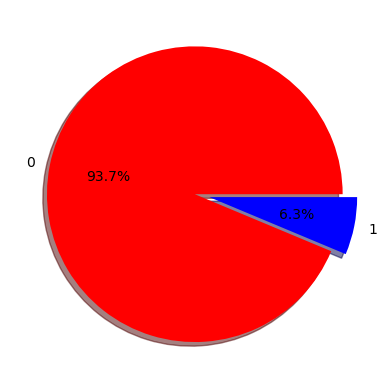

In [7]:
labels=hrtattack_sr.index
colors=['red', 'blue']
explode=(0,0.1)
plt.pie(hrtattack_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()


In [8]:
stroke_sr=southregion.groupby('HadStroke')['HadStroke'].count()
stroke_sr

HadStroke
0    51773
1     2858
Name: HadStroke, dtype: int64

In [9]:
stroke_sr.index

Index([0, 1], dtype='int64', name='HadStroke')

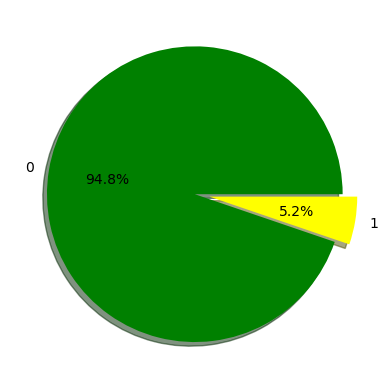

In [10]:
labels=stroke_sr.index
colors=['green', 'yellow']
explode=(0,0.1)
plt.pie(stroke_sr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

In [11]:
states_sr=southregion.groupby(['State'])['State'].count()
states_sr

State
Alabama           1902
Arkansas          2940
Florida           7315
Georgia           4978
Kentucky          2413
Louisiana         3010
Mississippi       2438
North Carolina    2551
Oklahoma          2941
South Carolina    5471
Tennessee         2725
Texas             7408
Virginia          5565
West Virginia     2974
Name: State, dtype: int64

In [12]:
average_bmi_state=southregion.groupby(['State'])['BMI'].mean()
average_bmi_state

State
Alabama           29.474543
Arkansas          29.213888
Florida           28.568051
Georgia           29.013072
Kentucky          29.522768
Louisiana         29.396684
Mississippi       30.211550
North Carolina    28.750282
Oklahoma          29.308385
South Carolina    28.894487
Tennessee         29.304037
Texas             29.245875
Virginia          28.836013
West Virginia     29.882629
Name: BMI, dtype: float64

In [38]:
bmi_stats=southregion.groupby(['State','HadHeartAttack'])['BMI'].describe()
bmi_stats

count       mean       std    min      25%  \
State          HadHeartAttack                                                
Alabama        0               1778.0  29.398988  6.717422  15.00  24.8900   
               1                124.0  30.557903  8.180369  16.47  25.7950   
Arkansas       0               2696.0  29.250371  6.770870  12.69  24.6900   
               1                244.0  28.810779  6.652783  16.46  24.6700   
Florida        0               6758.0  28.486391  6.451155  13.00  24.1025   
               1                557.0  29.558815  7.397844  13.29  25.0700   
Georgia        0               4702.0  28.978945  6.736249  12.75  24.4100   
               1                276.0  29.594457  6.368545  14.14  25.1450   
Kentucky       0               2255.0  29.451667  7.314486  13.85  24.6800   
               1                158.0  30.537532  7.691754  13.81  25.7825   
Louisiana      0               2831.0  29.385274  6.851969  13.75  24.5950   
               1                179.0  29.577151  6.338452  17.58  25.3650   
Mississippi    0               2305.0  30.187722  7.240199  14.76  25.0900   
               1                133.0  30.624511  6.682805  19.35  26.0900   
North Carolina 0               2424.0  28.748189  6.357574  12.92  24.3700   
               1                127.0  28.790236  6.266744  18.38  24.3300   
Oklahoma       0               2753.0  29.336092  6.704499  13.87  24.6900   
               1                188.0  28.902660  6.213128  14.12  24.3850   
South Carolina 0               5173.0  28.842391  6.645485  12.11  24.3900   
               1                298.0  29.798826  6.142537  16.37  25.7225   
Tennessee      0               2548.0  29.261028  6.950447  13.66  24.5600   
               1                177.0  29.923164  6.592401  16.28  25.5100   
Texas          0               6982.0  29.208021  6.929178  12.91  24.4100   
               1                426.0  29.866291  6.570111  16.95  25.0925   
Virginia       0               5256.0  28.765685  6.543621  12.11  24.2175   
               1                309.0  30.032265  6.989773  16.14  25.7900   
West Virginia  0               2728.0  29.828559  7.190247  12.27  25.0600   
               1                246.0  30.482236  7.144169  16.73  25.8425   

                                  50%      75%    max  
State          HadHeartAttack                          
Alabama        0               28.300  32.9200  61.97  
               1               29.260  33.4550  91.55  
Arkansas       0               28.190  32.6100  94.66  
               1               27.845  32.1025  67.81  
Florida        0               27.440  31.7500  83.20  
               1               28.530  33.0000  95.66  
Georgia        0               27.920  32.1100  97.65  
               1               28.445  33.3600  51.54  
Kentucky       0               28.190  32.7700  81.37  
               1               29.600  33.8925  79.41  
Louisiana      0               28.120  32.8900  66.56  
               1               29.050  32.9200  59.97  
Mississippi    0               28.970  33.9100  75.74  
               1               29.030  33.8400  50.30  
North Carolina 0               27.670  32.1000  62.65  
               1               27.800  30.9300  58.73  
Oklahoma       0               28.310  32.9200  73.81  
               1               28.220  32.3325  53.16  
South Carolina 0               27.500  32.0100  83.22  
               1               29.040  32.5350  52.47  
Tennessee      0               28.060  32.6100  97.43  
               1               28.800  33.2500  52.78  
Texas          0               28.170  32.4900  92.01  
               1               28.930  33.2300  59.52  
Virginia       0               27.620  32.1200  83.45  
               1               28.290  32.5500  60.36  
West Virginia  0               28.515  33.4025  82.22  
               1               29.285  33.6675  70.86

In [37]:
weight_stats=southregion.groupby(['State','HadHeartAttack'])['WeightInKilograms'].describe()
weight_stats

count       mean        std    min      25%  \
State          HadHeartAttack                                                 
Alabama        0               1778.0  85.002576  21.464641  37.19  70.3100   
               1                124.0  88.428065  19.620462  44.91  73.4800   
Arkansas       0               2696.0  85.377871  22.212987  29.48  69.8500   
               1                244.0  85.184180  21.274490  38.10  68.3775   
Florida        0               6758.0  82.828269  21.303534  36.29  68.0400   
               1                557.0  87.129497  23.109033  37.19  70.7600   
Georgia        0               4702.0  84.171055  21.705693  35.83  68.0400   
               1                276.0  87.078225  21.950451  31.75  71.4425   
Kentucky       0               2255.0  86.611973  24.535017  38.56  68.9500   
               1                158.0  89.208038  25.365139  43.09  72.5700   
Louisiana      0               2831.0  85.047686  21.902004  37.65  68.0400   
               1                179.0  86.983184  22.368408  45.36  72.5700   
Mississippi    0               2305.0  88.144629  22.863076  39.01  71.6700   
               1                133.0  91.410602  20.664572  45.36  77.1100   
North Carolina 0               2424.0  83.666696  20.453633  38.56  68.0400   
               1                127.0  84.957402  20.340305  58.06  69.6250   
Oklahoma       0               2753.0  85.500323  22.257838  38.10  68.9500   
               1                188.0  85.767926  22.113544  44.45  70.3100   
South Carolina 0               5173.0  83.767499  21.218186  28.12  68.0400   
               1                298.0  88.888658  20.728107  46.72  74.8400   
Tennessee      0               2548.0  86.061480  22.082715  38.10  70.3100   
               1                177.0  88.768701  22.219007  40.37  72.5700   
Texas          0               6982.0  84.733321  21.956845  36.29  68.0400   
               1                426.0  87.528075  21.405989  45.36  72.5700   
Virginia       0               5256.0  83.558014  20.891576  34.02  68.0400   
               1                309.0  88.323754  22.485412  44.00  72.5700   
West Virginia  0               2728.0  86.508853  22.922648  30.84  70.3100   
               1                246.0  88.789553  22.655164  45.36  74.8400   

                                  50%       75%     max  
State          HadHeartAttack                            
Alabama        0               81.650   97.5200  204.12  
               1               86.180  100.0175  145.15  
Arkansas       0               81.650   97.5200  249.48  
               1               81.875   99.7900  161.03  
Florida        0               80.740   95.2500  240.40  
               1               83.910  101.6000  192.32  
Georgia        0               81.650   95.2500  226.80  
               1               86.180   99.7900  172.37  
Kentucky       0               81.650   99.7900  273.52  
               1               86.180  100.4725  229.97  
Louisiana      0               81.650   97.5200  181.44  
               1               83.910   98.8850  195.04  
Mississippi    0               84.820  100.7000  234.51  
               1               90.260  104.3300  163.29  
North Carolina 0               81.650   95.2500  224.53  
               1               81.650   97.5200  170.10  
Oklahoma       0               81.650   98.8800  231.33  
               1               83.460   99.4525  177.81  
South Carolina 0               81.650   95.2500  263.08  
               1               85.955   99.7900  179.17  
Tennessee      0               81.650   98.8800  249.48  
               1               86.180   99.7900  155.13  
Texas          0               81.650   97.0700  226.80  
               1               85.955   99.7900  177.81  
Virginia       0               81.650   95.2500  234.51  
               1               86.180   99.7900  199.58  
West Virginia  0               83.460

In [39]:
stroke_weight_stats=southregion.groupby(['State','HadStroke'])['WeightInKilograms'].describe()
stroke_weight_stats

count       mean        std    min      25%  \
State          HadStroke                                                 
Alabama        0          1778.0  85.248465  21.367554  37.19  70.3100   
               1           124.0  84.902339  21.353822  40.37  70.3100   
Arkansas       0          2744.0  85.476082  22.089587  29.48  69.8500   
               1           196.0  83.761786  22.732042  40.82  68.0400   
Florida        0          6886.0  83.055495  21.460798  36.29  68.0400   
               1           429.0  84.765571  21.663478  37.19  68.9500   
Georgia        0          4732.0  84.424328  21.741532  35.83  68.0400   
               1           246.0  82.560854  21.418248  31.75  68.0400   
Kentucky       0          2269.0  86.961970  24.819528  38.56  69.8500   
               1           144.0  83.945556  20.568960  42.64  69.8500   
Louisiana      0          2847.0  85.175318  21.894762  37.65  68.2650   
               1           163.0  84.943926  22.622981  38.10  68.0400   
Mississippi    0          2316.0  88.390082  22.843805  39.01  72.5700   
               1           122.0  87.045492  21.083894  46.72  72.7975   
North Carolina 0          2437.0  83.597111  20.401297  38.56  68.0400   
               1           114.0  86.592105  21.270261  47.63  72.5700   
Oklahoma       0          2806.0  85.596992  22.308001  38.10  69.4000   
               1           135.0  83.863704  20.901834  47.63  68.0400   
South Carolina 0          5224.0  84.051985  21.313918  28.12  68.0400   
               1           247.0  83.929231  19.208548  45.36  70.3100   
Tennessee      0          2574.0  86.292661  22.182577  38.10  70.3100   
               1           151.0  85.294040  20.640849  40.37  72.1200   
Texas          0          7097.0  84.854123  21.870993  36.29  68.0400   
               1           311.0  85.804823  23.339499  41.73  68.2650   
Virginia       0          5285.0  83.662594  20.942557  34.02  68.0400   
               1           280.0  86.843393  22.056814  39.92  70.7600   
West Virginia  0          2778.0  86.712772  22.912946  30.84  70.3100   
               1           196.0  86.481122  22.856769  41.28  72.3450   

                             50%       75%     max  
State          HadStroke                            
Alabama        0          81.650   97.5200  204.12  
               1          83.910   97.5225  166.92  
Arkansas       0          82.550   97.5200  249.48  
               1          81.190   94.4625  227.25  
Florida        0          80.740   95.2500  240.40  
               1          81.650   97.5200  196.41  
Georgia        0          81.650   96.1600  226.80  
               1          79.380   92.9900  156.49  
Kentucky       0          83.010   99.7900  273.52  
               1          81.650   97.8600  147.42  
Louisiana      0          81.650   97.5200  195.04  
               1          81.650   99.1100  181.44  
Mississippi    0          85.505  101.6000  234.51  
               1          83.910   99.7900  163.29  
North Carolina 0          81.650   95.2500  224.53  
               1          83.685   99.5625  170.10  
Oklahoma       0          81.650   98.8800  231.33  
               1          81.650   98.2000  138.35  
South Carolina 0          81.650   95.2500  263.08  
               1          81.650   95.2500  143.34  
Tennessee      0          82.550   99.7900  249.48  
               1          81.650   94.3500  145.15  
Texas          0          81.650   97.5200  226.80  
               1          81.650   98.2050  181.44  
Virginia       0          81.650   95.2500  234.51  
               1          85.050   99.7900  199.58  
West Virginia  0          83.910   99.7900  217.27  
               1          81.650   97.5200  171.46

In [46]:
Stroke_BMI_stats=southregion.groupby(['HadHeartAttack']==1)['BMI'].describe()
Stroke_BMI_stats

count       mean       std    min      25%  \
State          HadHeartAttack                                                
Alabama        0               1778.0  29.398988  6.717422  15.00  24.8900   
               1                124.0  30.557903  8.180369  16.47  25.7950   
Arkansas       0               2696.0  29.250371  6.770870  12.69  24.6900   
               1                244.0  28.810779  6.652783  16.46  24.6700   
Florida        0               6758.0  28.486391  6.451155  13.00  24.1025   
               1                557.0  29.558815  7.397844  13.29  25.0700   
Georgia        0               4702.0  28.978945  6.736249  12.75  24.4100   
               1                276.0  29.594457  6.368545  14.14  25.1450   
Kentucky       0               2255.0  29.451667  7.314486  13.85  24.6800   
               1                158.0  30.537532  7.691754  13.81  25.7825   
Louisiana      0               2831.0  29.385274  6.851969  13.75  24.5950   
               1                179.0  29.577151  6.338452  17.58  25.3650   
Mississippi    0               2305.0  30.187722  7.240199  14.76  25.0900   
               1                133.0  30.624511  6.682805  19.35  26.0900   
North Carolina 0               2424.0  28.748189  6.357574  12.92  24.3700   
               1                127.0  28.790236  6.266744  18.38  24.3300   
Oklahoma       0               2753.0  29.336092  6.704499  13.87  24.6900   
               1                188.0  28.902660  6.213128  14.12  24.3850   
South Carolina 0               5173.0  28.842391  6.645485  12.11  24.3900   
               1                298.0  29.798826  6.142537  16.37  25.7225   
Tennessee      0               2548.0  29.261028  6.950447  13.66  24.5600   
               1                177.0  29.923164  6.592401  16.28  25.5100   
Texas          0               6982.0  29.208021  6.929178  12.91  24.4100   
               1                426.0  29.866291  6.570111  16.95  25.0925   
Virginia       0               5256.0  28.765685  6.543621  12.11  24.2175   
               1                309.0  30.032265  6.989773  16.14  25.7900   
West Virginia  0               2728.0  29.828559  7.190247  12.27  25.0600   
               1                246.0  30.482236  7.144169  16.73  25.8425   

                                  50%      75%    max  
State          HadHeartAttack                          
Alabama        0               28.300  32.9200  61.97  
               1               29.260  33.4550  91.55  
Arkansas       0               28.190  32.6100  94.66  
               1               27.845  32.1025  67.81  
Florida        0               27.440  31.7500  83.20  
               1               28.530  33.0000  95.66  
Georgia        0               27.920  32.1100  97.65  
               1               28.445  33.3600  51.54  
Kentucky       0               28.190  32.7700  81.37  
               1               29.600  33.8925  79.41  
Louisiana      0               28.120  32.8900  66.56  
               1               29.050  32.9200  59.97  
Mississippi    0               28.970  33.9100  75.74  
               1               29.030  33.8400  50.30  
North Carolina 0               27.670  32.1000  62.65  
               1               27.800  30.9300  58.73  
Oklahoma       0               28.310  32.9200  73.81  
               1               28.220  32.3325  53.16  
South Carolina 0               27.500  32.0100  83.22  
               1               29.040  32.5350  52.47  
Tennessee      0               28.060  32.6100  97.43  
               1               28.800  33.2500  52.78  
Texas          0               28.170  32.4900  92.01  
               1               28.930  33.2300  59.52  
Virginia       0               27.620  32.1200  83.45  
               1               28.290  32.5500  60.36  
West Virginia  0               28.515  33.4025  82.22  
               1               29.285  33.6675  70.86

In [13]:
average_weight_state=southregion.groupby(['State'])['WeightInKilograms'].mean()
average_weight_state

State
Alabama           85.225899
Arkansas          85.361796
Florida           83.155785
Georgia           84.332240
Kentucky          86.781960
Louisiana         85.162787
Mississippi       88.322797
North Carolina    83.730953
Oklahoma          85.517429
South Carolina    84.046443
Tennessee         86.237325
Texas             84.894035
Virginia          83.822634
West Virginia     86.697505
Name: WeightInKilograms, dtype: float64

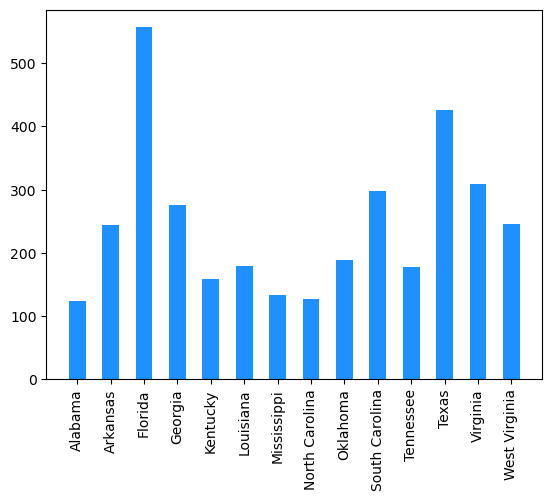

In [22]:
hrtattack_state=southregion[southregion['HadHeartAttack']==1].groupby('State').size()
# hrtattack_state
xvalue=np.arange(len(hrtattack_state))
yvalue=hrtattack_state
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [23]:
 hrtattack_state

State
Alabama           124
Arkansas          244
Florida           557
Georgia           276
Kentucky          158
Louisiana         179
Mississippi       133
North Carolina    127
Oklahoma          188
South Carolina    298
Tennessee         177
Texas             426
Virginia          309
West Virginia     246
dtype: int64

In [35]:
bmi=southregion[southregion['HadHeartAttack']==1].groupby(['State','BMI'])


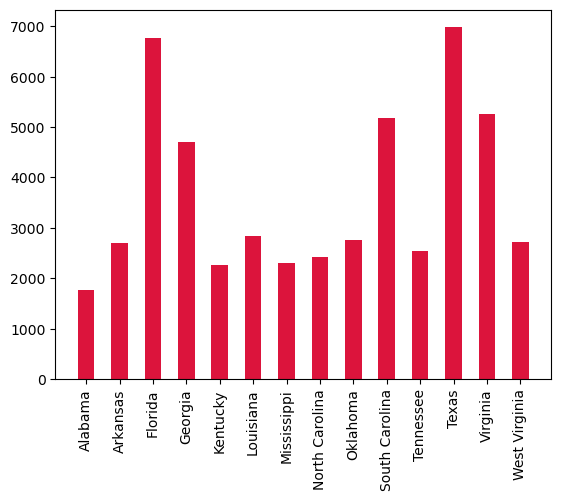

In [16]:
Nohrtattack_state=southregion[southregion['HadHeartAttack']==0].groupby('State').size()
xvalue=np.arange(len(Nohrtattack_state))
yvalue=Nohrtattack_state
plt.bar(xvalue,yvalue, color='crimson', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [17]:
Nohrtattack_state

State
Alabama           1778
Arkansas          2696
Florida           6758
Georgia           4702
Kentucky          2255
Louisiana         2831
Mississippi       2305
North Carolina    2424
Oklahoma          2753
South Carolina    5173
Tennessee         2548
Texas             6982
Virginia          5256
West Virginia     2728
dtype: int64

In [18]:
# Sex breakdown
Sex_id=southregion.groupby('Sex')['Sex'].count()
Sex_id

Sex
Female    29453
Male      25178
Name: Sex, dtype: int64

In [19]:
Nohrtattack_sex=southregion[southregion['HadHeartAttack']==0].groupby('Sex').size()
Nohrtattack_sex.index

Index(['Female', 'Male'], dtype='object', name='Sex')

In [37]:
# south_female=southregion[southregion['Sex']=='Female']
# south_female

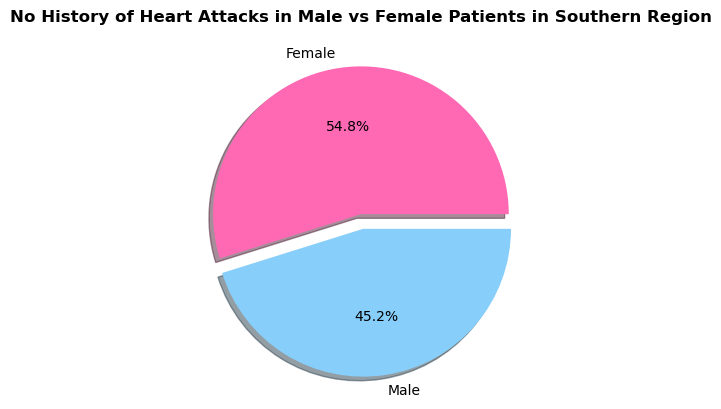

In [20]:
colors=['hotpink','lightskyblue']
labels=Nohrtattack_sex.index
explode=(0, 0.1)
plt.pie(Nohrtattack_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attacks in Male vs Female Patients in Southern Region", fontweight='bold')
plt.show()

In [21]:
hrtattack_sex=southregion[southregion['HadHeartAttack']==1].groupby('Sex').size()
hrtattack_sex.index

Index(['Female', 'Male'], dtype='object', name='Sex')

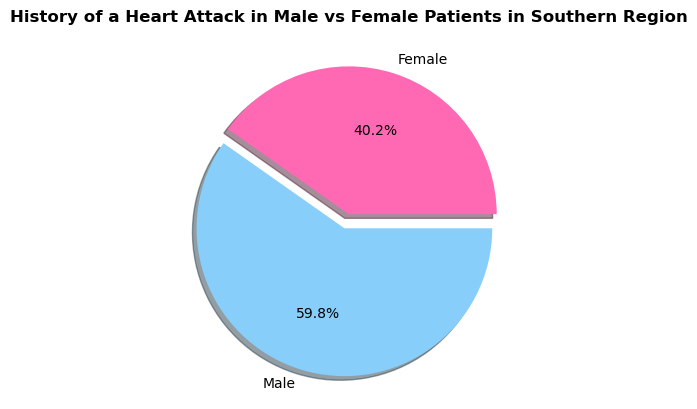

In [22]:
colors=['hotpink','lightskyblue']
labels=hrtattack_sex.index
explode=(0, 0.1)
plt.pie(hrtattack_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of a Heart Attack in Male vs Female Patients in Southern Region", fontweight='bold')
plt.show()

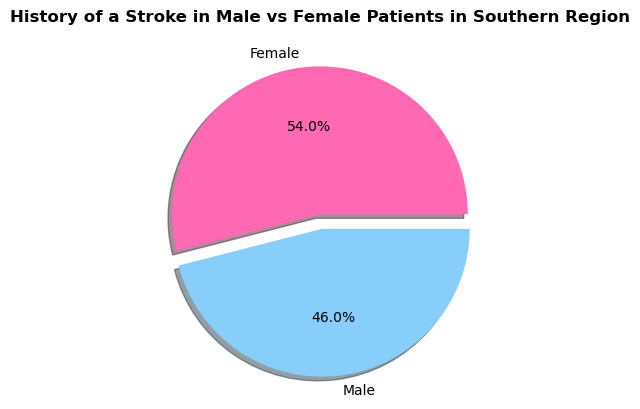

In [60]:
stroke_sex=southregion[southregion['HadStroke']==1].groupby('Sex').size()
stroke_sex.index
colors=['hotpink','lightskyblue']
labels=stroke_sex.index
explode=(0, 0.1)
plt.pie(stroke_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of a Stroke in Male vs Female Patients in Southern Region", fontweight='bold')
plt.show()

In [23]:
south_female=southregion[southregion["Sex"]=='Female']
south_female.head()
south_male=southregion[southregion["Sex"]=='Male']


In [24]:
# T test on Sex Distribution of Had Heart Attack
cat1=south_female['HadHeartAttack']
cat2=south_male['HadHeartAttack']
ttest_ind(cat1, cat2)

TtestResult(statistic=-16.668701635129242, pvalue=3.1556670886651587e-62, df=54629.0)

In [25]:
cat1=south_female['HadStroke']
cat2=south_male['HadStroke']
ttest_ind(cat1, cat2)

TtestResult(statistic=0.08393648861519239, pvalue=0.9331072357494374, df=54629.0)

In [40]:
# Female Distribution of Alcohol Drinkers
south_female_alch=south_female[south_female['AlcoholDrinkers']==1]
south_female_noalch=south_female[south_female['AlcoholDrinkers']==0]

# Female Distribution of Removed Teeth
south_female_teeth0=south_female[south_female['RemovedTeeth']==0]
south_female_teeth1=south_female[south_female['RemovedTeeth']==1]
south_female_teeth2=south_female[south_female['RemovedTeeth']==2]
south_female_teeth3=south_female[south_female['RemovedTeeth']==3]


# Female Distribution of Smokers
south_female_smoke0=south_female[south_female['SmokerStatus']==0]
south_female_smoke1=south_female[south_female['SmokerStatus']==1]
south_female_smoke2=south_female[south_female['SmokerStatus']==2]
south_female_smoke3=south_female[south_female['SmokerStatus']==3]


# Female Distribution of ECigs
south_female_esmoke0=south_female[south_female['ECigaretteUsage']==0]
south_female_esmoke1=south_female[south_female['ECigaretteUsage']==1]
south_female_esmoke2=south_female[south_female['ECigaretteUsage']==2]

# Female Distribution of Sleep
south_female_sleep=south_female['SleepHours']
# Female Distribution of Ethnicity
south_female_race=south_female[south_female['RaceEthnicityCategory']==0]
south_female_race1=south_female[south_female['RaceEthnicityCategory']==1]
south_female_race2=south_female[south_female['RaceEthnicityCategory']==2]
south_female_race3=south_female[south_female['RaceEthnicityCategory']==3]
south_female_race4=south_female[south_female['RaceEthnicityCategory']==4]
south_female_race4.head(5)

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
63,Alabama,South,Female,0,0,0,Within past year (anytime less than 12 months ...,1,8,0,...,1.78,91.63,28.98,1,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
134,Alabama,South,Female,2,0,0,Within past year (anytime less than 12 months ...,1,6,1,...,1.63,77.11,29.18,0,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,Yes
166,Alabama,South,Female,1,0,0,Within past year (anytime less than 12 months ...,1,7,1,...,1.78,87.09,27.55,1,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
422,Alabama,South,Female,3,20,2,Within past year (anytime less than 12 months ...,0,7,2,...,1.65,54.43,19.97,1,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
720,Alabama,South,Female,1,0,0,Within past year (anytime less than 12 months ...,1,5,3,...,1.55,68.04,28.34,1,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes


In [45]:
# hrtat_female_sleep=south_female['SleepHours'].groupby[('HeartAttack')==1].size()
# hrtat_female_sleep

TypeError: 'method' object is not subscriptable

In [63]:
Nostroke_state=southregion[southregion['HadStroke']==0].groupby('State').size()
Nostroke_state

State
Alabama           1778
Arkansas          2744
Florida           6886
Georgia           4732
Kentucky          2269
Louisiana         2847
Mississippi       2316
North Carolina    2437
Oklahoma          2806
South Carolina    5224
Tennessee         2574
Texas             7097
Virginia          5285
West Virginia     2778
dtype: int64

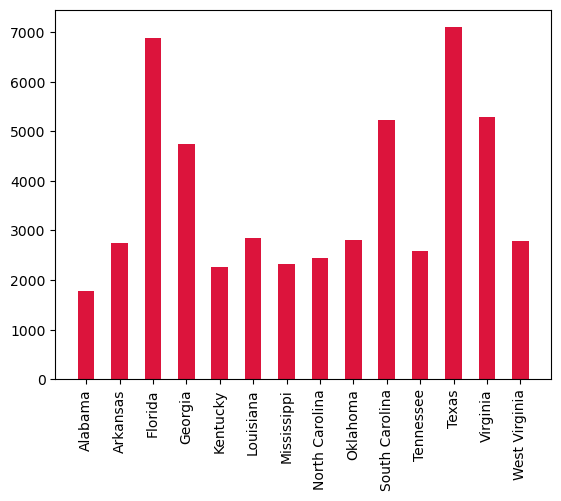

In [64]:
Nostroke_state=southregion[southregion['HadStroke']==0].groupby('State').size()
xvalue=np.arange(len(Nostroke_state))
yvalue=Nostroke_state
plt.bar(xvalue,yvalue, color='crimson', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [65]:
stroke_state=southregion[southregion['HadStroke']==1].groupby('State').size()
stroke_state

State
Alabama           124
Arkansas          196
Florida           429
Georgia           246
Kentucky          144
Louisiana         163
Mississippi       122
North Carolina    114
Oklahoma          135
South Carolina    247
Tennessee         151
Texas             311
Virginia          280
West Virginia     196
dtype: int64

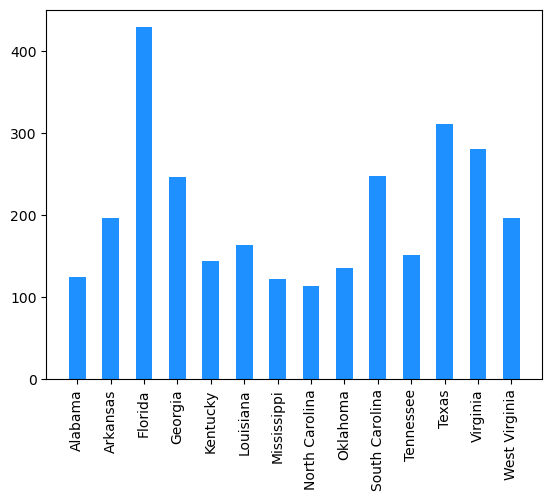

In [66]:
stroke_state=southregion[southregion['HadStroke']==1].groupby('State').size()
# hrtattack_state
xvalue=np.arange(len(stroke_state))
yvalue=stroke_state
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi",
                            "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

In [67]:
Heart_Stroke_bystate=southregion[["State","HadHeartAttack","HadStroke"]]
Heart_Stroke_bystate=Heart_Stroke_bystate.set_index("State")
Heart_Stroke_bystate

,HadHeartAttack,HadStroke
State,,
Alabama,0,0
Alabama,0,0
Alabama,0,0
Alabama,0,0
Alabama,0,0
...,...,...
West Virginia,0,0
West Virginia,0,0
West Virginia,0,0


In [48]:
hrtattack_goodhealth=southregion[southregion['HadHeartAttack']==1].groupby('GeneralHealth').size()
hrtattack_goodhealth.index

Index([0, 1, 2, 3, 4], dtype='int64', name='GeneralHealth')

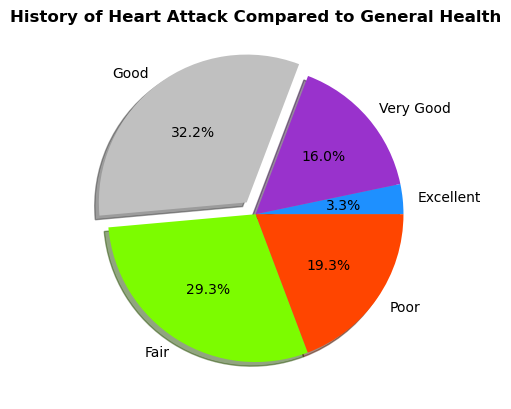

In [51]:
colors=['dodgerblue','darkorchid', 'silver', 'lawngreen', 'orangered']
labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
explode=(0,0, 0.1,0,0)
plt.pie(hrtattack_goodhealth, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of Heart Attack Compared to General Health", fontweight='bold')
plt.savefig("HrtATt_GenHealth.png")
plt.show()


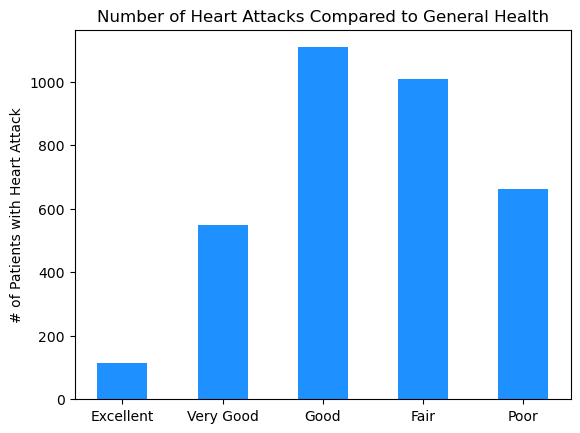

In [65]:
hrtattack_goodhealth=southregion[southregion['HadHeartAttack']==1].groupby('GeneralHealth').size()
# hrtattack_state
xvalue=np.arange(len(hrtattack_goodhealth))
yvalue=hrtattack_goodhealth
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.title("Number of Heart Attacks Compared to General Health")
plt.ylabel("# of Patients with Heart Attack")
plt.xticks(tick_locations, ["Excellent", "Very Good", "Good", "Fair", "Poor"])
plt.show()

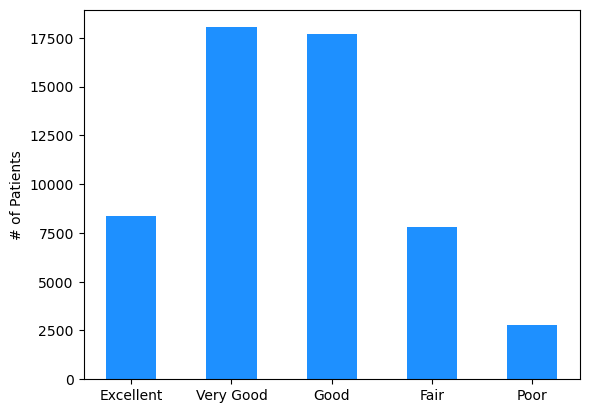

In [69]:
gen=southregion.groupby('GeneralHealth').size()
xvalue=np.arange(len(gen))
yvalue=gen
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
# plt.title("Number of Heart Attacks Compared to General Health")
plt.ylabel("# of Patients")
plt.xticks(tick_locations, ["Excellent", "Very Good", "Good", "Fair", "Poor"])
plt.show()

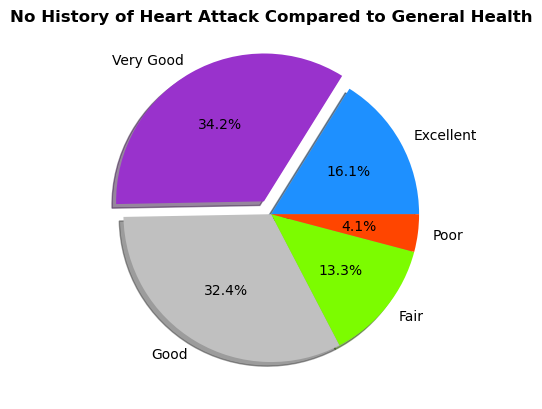

In [77]:
nohrtattack_goodhealth=southregion[southregion['HadHeartAttack']==0].groupby('GeneralHealth').size()
colors=['dodgerblue','darkorchid', 'silver', 'lawngreen', 'orangered']
labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
explode=(0,0.1, 0,0,0)
plt.pie(nohrtattack_goodhealth, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attack Compared to General Health", fontweight='bold')
plt.show()

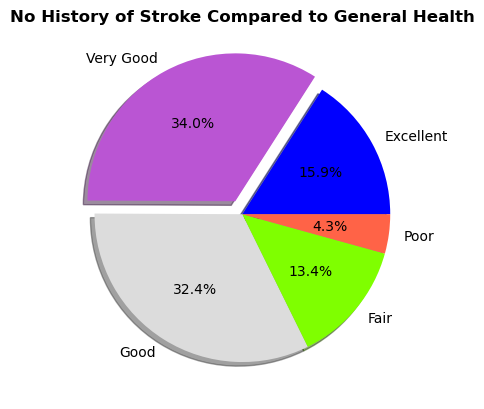

In [78]:
nostroke_goodhealth=southregion[southregion['HadStroke']==0].groupby('GeneralHealth').size()
colors=['blue','mediumorchid', 'gainsboro', 'chartreuse', 'tomato']
labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
explode=(0,0.1, 0,0,0)
plt.pie(nostroke_goodhealth, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Stroke Compared to General Health", fontweight='bold')
plt.show()

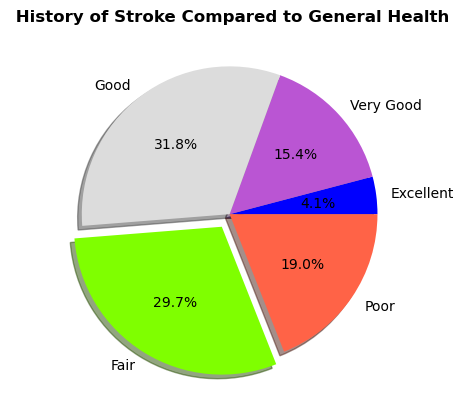

In [80]:
stroke_goodhealth=southregion[southregion['HadStroke']==1].groupby('GeneralHealth').size()
colors=['blue','mediumorchid', 'gainsboro', 'chartreuse', 'tomato']
labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
explode=(0,0, 0,0.1,0)
plt.pie(stroke_goodhealth, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Stroke Compared to General Health", fontweight='bold')
plt.show()

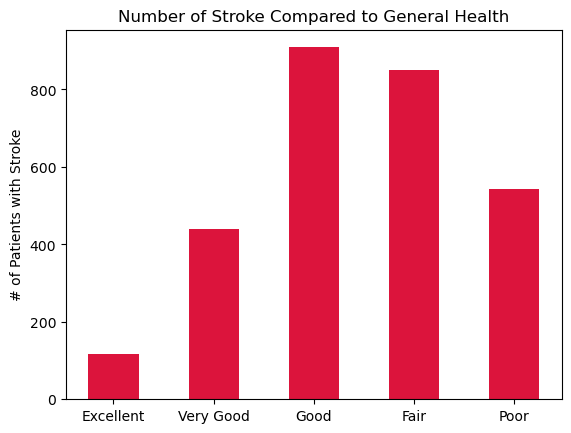

In [58]:
stroke_goodhealth=southregion[southregion['HadStroke']==1].groupby('GeneralHealth').size()
# hrtattack_state
xvalue=np.arange(len(stroke_goodhealth))
yvalue=stroke_goodhealth
plt.bar(xvalue,yvalue, color='crimson', width=0.5)
tick_locations = [value for value in xvalue]
plt.title("Number of Stroke Compared to General Health")
plt.ylabel("# of Patients with Stroke")
plt.xticks(tick_locations, ["Excellent", "Very Good", "Good", "Fair", "Poor"])
plt.show()

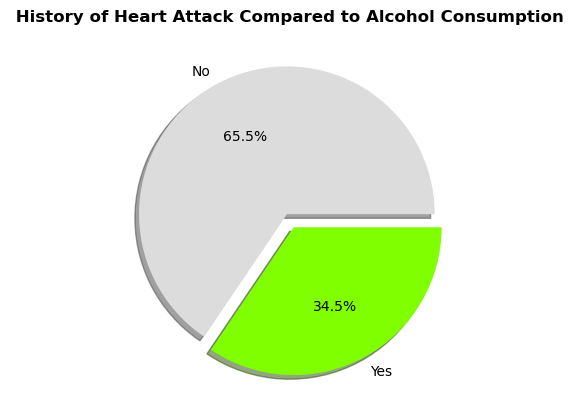

In [35]:
hrtattack_alcohol=southregion[southregion['HadHeartAttack']==1].groupby('AlcoholDrinkers').size()
colors=['gainsboro', 'chartreuse']
labels=['No', 'Yes']
explode=(0,0.1)
plt.pie(hrtattack_alcohol, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Heart Attack Compared to Alcohol Consumption", fontweight='bold')
plt.show()

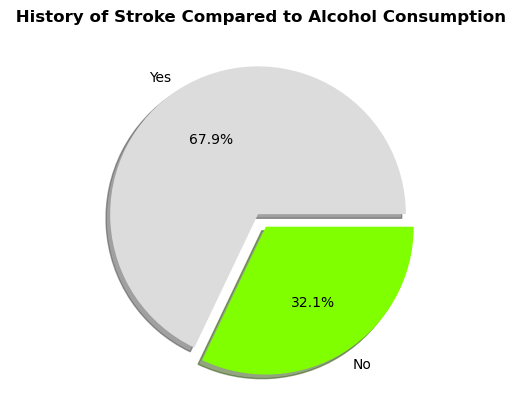

In [42]:
stroke_alcohol=southregion[southregion['HadStroke']==1].groupby('AlcoholDrinkers').size()
colors=['gainsboro', 'chartreuse']
labels=['Yes', 'No']
explode=(0,0.1)
plt.pie(stroke_alcohol, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Stroke Compared to Alcohol Consumption", fontweight='bold')
plt.show()

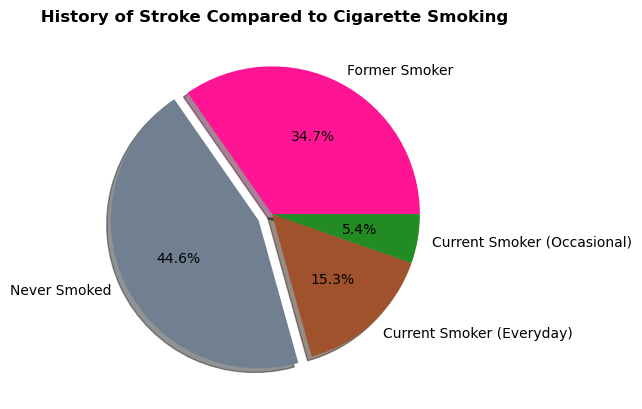

In [49]:
stroke_smoke=southregion[southregion['HadStroke']==1].groupby('SmokerStatus').size()
colors=['deeppink', 'slategrey', 'sienna', 'forestgreen']
labels=['Former Smoker', 'Never Smoked', 'Current Smoker (Everyday)', 'Current Smoker (Occasional)']
explode=(0,0.1,0,0)
plt.pie(stroke_smoke, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Stroke Compared to Cigarette Smoking", fontweight='bold')
plt.show()

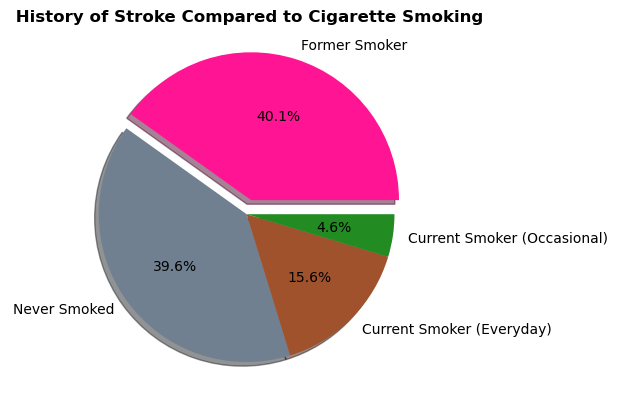

In [51]:
hrtattack_smoke=southregion[southregion['HadHeartAttack']==1].groupby('SmokerStatus').size()
colors=['deeppink', 'slategrey', 'sienna', 'forestgreen']
labels=['Former Smoker', 'Never Smoked', 'Current Smoker (Everyday)', 'Current Smoker (Occasional)']
explode=(0.1,0,0,0)
plt.pie(hrtattack_smoke, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Heart Attack Compared to Cigarette Smoking", fontweight='bold')
plt.show()

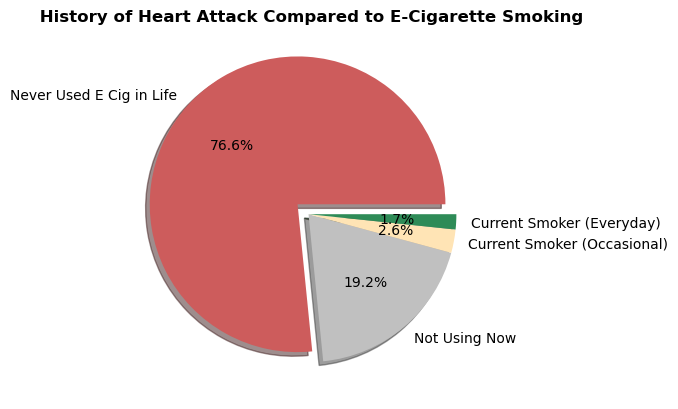

In [52]:
hrtattack_ecig=southregion[southregion['HadHeartAttack']==1].groupby('ECigaretteUsage').size()
colors=['indianred', 'silver', 'moccasin', 'seagreen']
labels=['Never Used E Cig in Life', 'Not Using Now', 'Current Smoker (Occasional)', 'Current Smoker (Everyday)']
explode=(0.1,0,0,0)
plt.pie(hrtattack_ecig, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Heart Attack Compared to E-Cigarette Smoking", fontweight='bold')
plt.show()

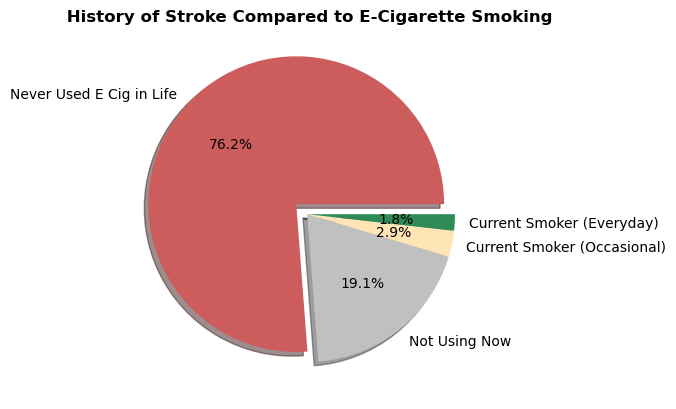

In [55]:
stroke_ecig=southregion[southregion['HadStroke']==1].groupby('ECigaretteUsage').size()
colors=['indianred', 'silver', 'moccasin', 'seagreen']
labels=['Never Used E Cig in Life', 'Not Using Now', 'Current Smoker (Occasional)', 'Current Smoker (Everyday)']
explode=(0.1,0,0,0)
plt.pie(stroke_ecig, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Stroke Compared to E-Cigarette Smoking", fontweight='bold')
plt.show()

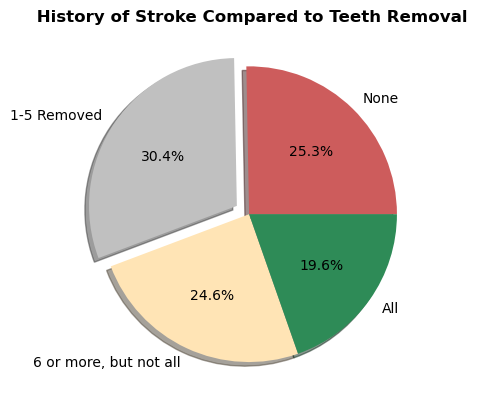

In [63]:
stroke_teeth=southregion[southregion['HadStroke']==1].groupby('RemovedTeeth').size()
colors=['indianred', 'silver', 'moccasin', 'seagreen']
labels=['None', '1-5 Removed', '6 or more, but not all', 'All']
explode=(0,0.1,0,0)
plt.pie(stroke_teeth, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title(" History of Stroke Compared to Teeth Removal", fontweight='bold')
plt.show()